## The Data

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

### Our Goal

I have historical data on loans given out with information on whether or not the borrower defaulted (charge off). I'll build a model that can predict whether or not a borrower will pay back their loan. This way in the future when I get a new potential customer I can assess whether or not they are likely to pay back the loan.

The "loan_status" column contains our label.

### Data Overview

----
-----
There are many LendingClub data sets on Kaggle. Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

## Starter Code

#### I also provide feature information on the data as a .csv file for easy lookup throughout the notebook:

In [124]:
import pandas as pd

In [125]:
data_info = pd.read_csv('lending_club_info.csv',index_col='LoanStatNew')

In [126]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [127]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [128]:
feat_info('mort_acc')

Number of mortgage accounts.


## Loading the data and other imports

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# might be needed depending on your version of Jupyter
%matplotlib inline

In [130]:
df = pd.read_csv('lending_club_loan_two.csv')

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
loan_amnt               396030 non-null float64
term                    396030 non-null object
int_rate                396030 non-null float64
installment             396030 non-null float64
grade                   396030 non-null object
sub_grade               396030 non-null object
emp_title               373103 non-null object
emp_length              377729 non-null object
home_ownership          396030 non-null object
annual_inc              396030 non-null float64
verification_status     396030 non-null object
issue_d                 396030 non-null object
loan_status             396030 non-null object
purpose                 396030 non-null object
title                   394275 non-null object
dti                     396030 non-null float64
earliest_cr_line        396030 non-null object
open_acc                396030 non-null float64
pub_rec                 396030 non-nu

In [132]:
df.head(5)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


# Section 1: Exploratory Data Analysis

**Section goals: Getting an understanding for which variables are important, view summary statistics, and visualize the data**

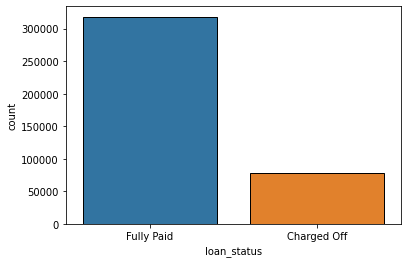

In [133]:
sns.countplot(x='loan_status',data=df)

(0.0, 45000.0)

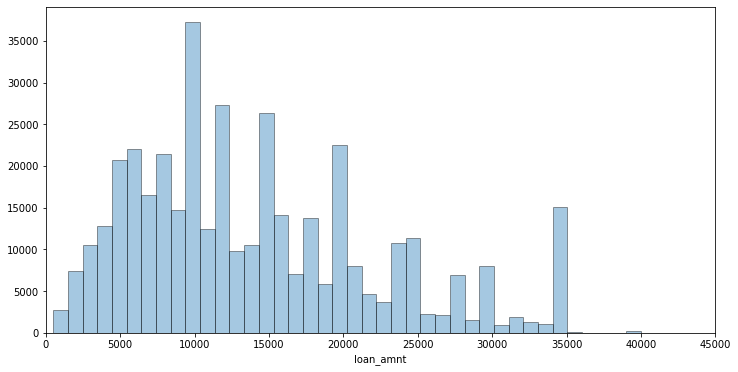

In [134]:
plt.figure(figsize=(12,6))
plt.rcParams["patch.force_edgecolor"] = True
sns.distplot(df['loan_amnt'], kde=False, bins=40)
plt.xlim(0, 45000)

In [135]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


(10.0, 0.0)

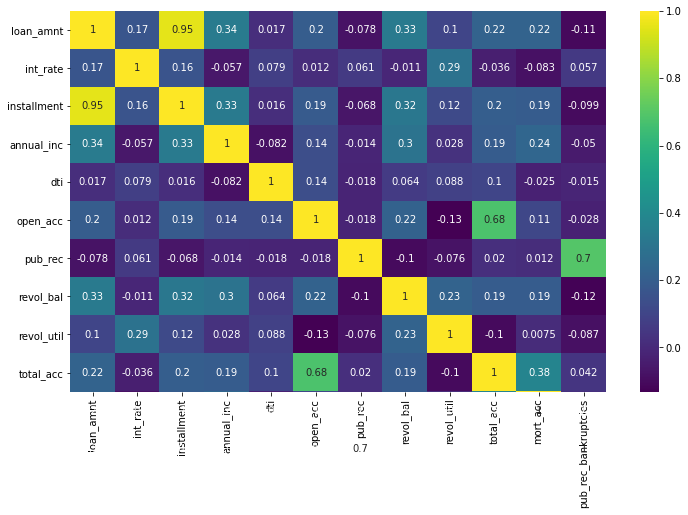

In [136]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.ylim(10, 0)

In [137]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


**There is almost perfect correlation between "loan_amnt" and "installment" features. I will explore these features further to understand whether this relationship makes sense or not.**

In [138]:
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


In [139]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


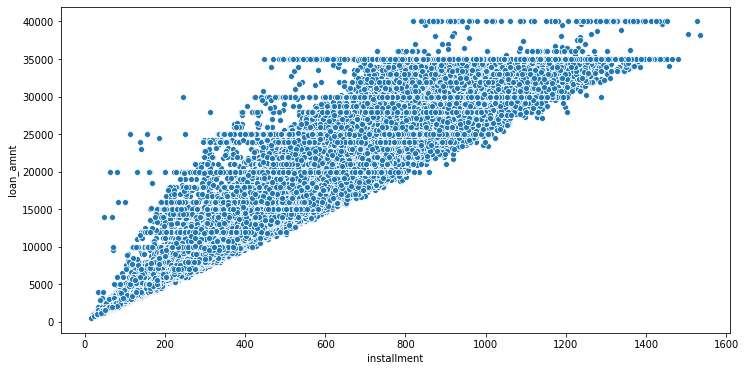

In [140]:
plt.figure(figsize = (12,6))
sns.scatterplot(x='installment', y='loan_amnt', data=df)

**Creating a boxplot showing the relationship between the loan_status and the Loan Amount.**

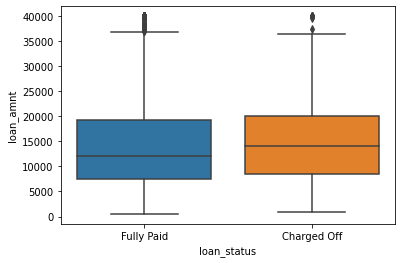

In [141]:
sns.boxplot(x='loan_status', y='loan_amnt', data=df)

**Calculating the summary statistics for the loan amount, grouped by the loan_status.**

In [142]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


**Exploring the Grade and SubGrade columns that LendingClub attributes to the loans. What are the unique possible grades and subgrades?**

In [143]:
feat_info('sub_grade')

LC assigned loan subgrade


In [144]:
sorted(df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [145]:
sorted(df['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

**Creating a countplot per grade, and setting the hue to the loan_status label.**

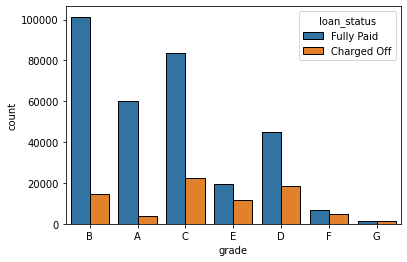

In [146]:
sns.countplot(x='grade',data=df,hue='loan_status')

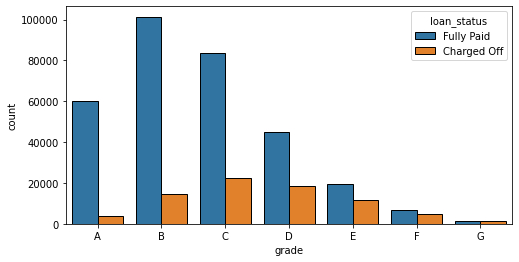

In [147]:
plt.figure(figsize = (8,4))
grade_order = sorted(df['grade'].unique())
sns.countplot(x='grade',data=df,order=grade_order, hue='loan_status')

**Displaying a countplot per subgrade. We may need to resize for this plot and reorder the x axis. Exploring both all loans made per subgrade as well being separated based on the loan_status**

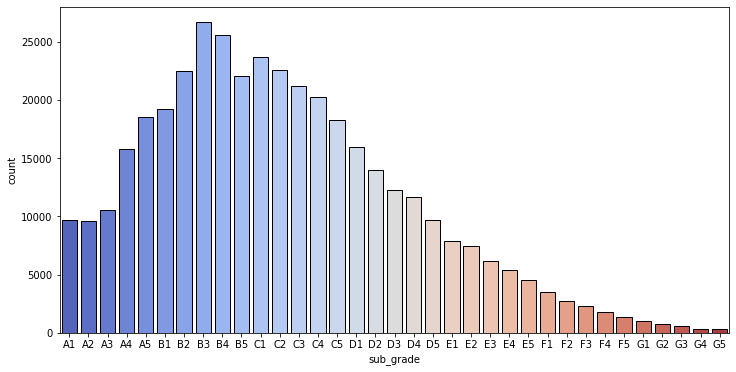

In [148]:
plt.figure(figsize=(12,6))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order = subgrade_order,palette='coolwarm' )

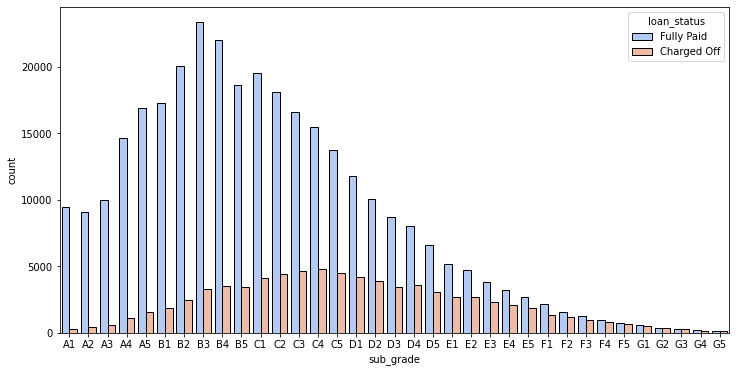

In [149]:
plt.figure(figsize=(12,6))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order = subgrade_order,palette='coolwarm' ,hue='loan_status')

**It looks like F and G subgrades don't get paid back that often. I will isolate those and recreate the countplot just for those subgrades.**

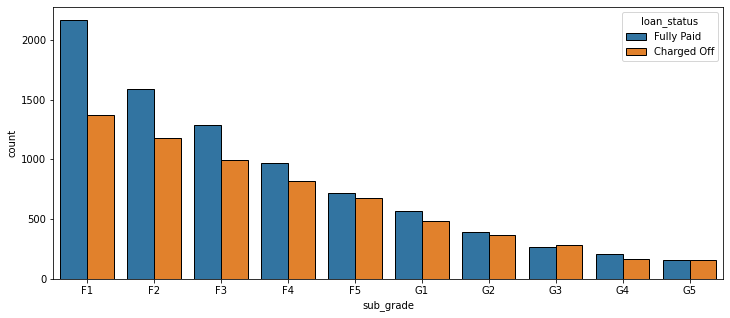

In [150]:
f_and_g = df[(df['grade']=='G') | (df['grade']=='F')]

plt.figure(figsize=(12,5))
subgrade_order = sorted(f_and_g['sub_grade'].unique())
sns.countplot(x='sub_grade',data=f_and_g,order = subgrade_order,hue='loan_status')
# ax.set(xlabel='SubGrades', ylabel='Count of Loans')

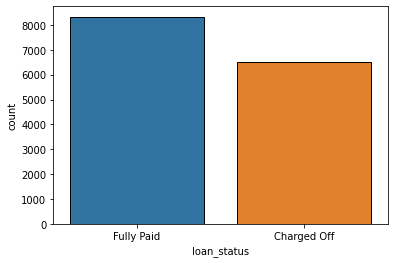

In [151]:
sns.countplot(x='loan_status',data=f_and_g)

**Creating a new column called 'load_repaid' which will contain a 1 if the loan status was "Fully Paid" and a 0 if it was "Charged Off".**

In [152]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [153]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

In [154]:
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


**Creating a bar plot showing the correlation of the numeric features to the new loan_repaid column.**

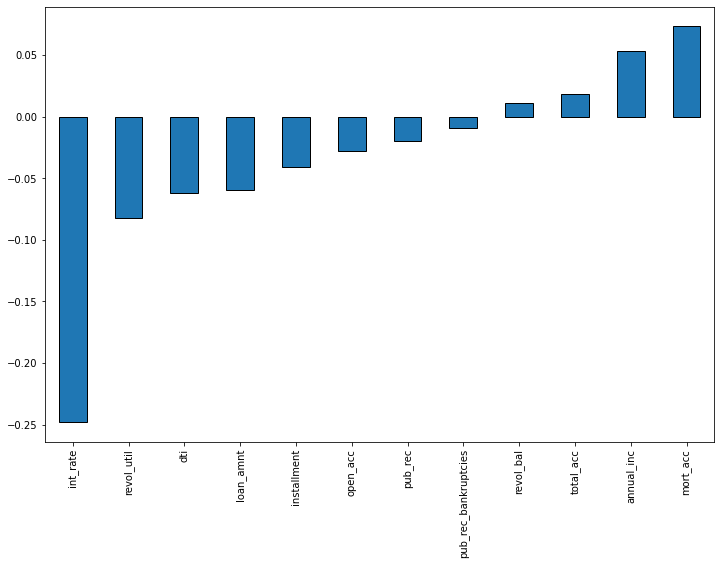

In [155]:
plt.figure(figsize=(12,8))
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

---
---
# Section 2: Data PreProcessing

**Section Goals: Removing or filling any missing data. Remove unnecessary or repetitive features. Convert categorical string features to dummy variables.**



In [156]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


# Missing Data

**Exploring these missing data columns. I use a variety of factors to decide whether or not they would be useful, to see if I should keep, discard, or fill in the missing data.**

**The length of the dataframe**

In [157]:
len(df)

396030

**Creating a Series that displays the total count of missing values per column.**

In [158]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

**Converting this Series to be in term of percentage of the total DataFrame**

In [159]:
100 * df.isnull().sum()/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

**Examining emp_title and emp_length to see whether it will be okay to drop them. Printing out their feature information using the feat_info() function from the top of this notebook.**

In [160]:
feat_info('emp_title')
print('\n')
feat_info('emp_length')

The job title supplied by the Borrower when applying for the loan.*


Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


**Number of employment job titles**

In [161]:
df['emp_title'].nunique()

173105

In [162]:
df['emp_title'].value_counts()

Teacher                                4389
Manager                                4250
Registered Nurse                       1856
RN                                     1846
Supervisor                             1830
                                       ... 
Internal Medicine Resident 3rd Year       1
VP West Coast Operations                  1
Reitter Wall Systems                      1
CMC Cable Solution                        1
Michael Stars                             1
Name: emp_title, Length: 173105, dtype: int64

**There are too many unique job titles to try to convert this to a dummy variable feature. I will remove that emp_title column.**

In [163]:
df = df.drop('emp_title',axis=1)

**Creating a countplot of the emp_length feature column. Sorting the order of the values.**

In [164]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [165]:
emp_length_order = [ '< 1 year',
                      '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                     '10+ years']

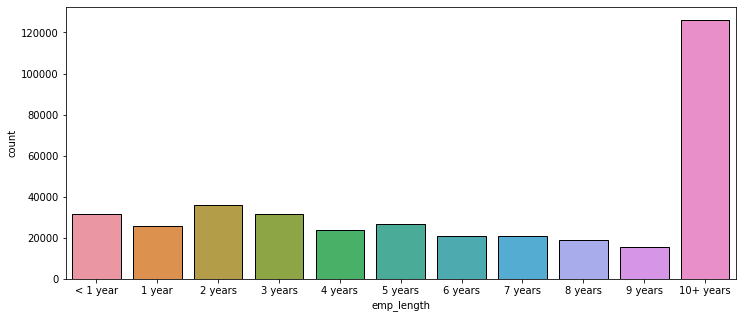

In [166]:
plt.figure(figsize=(12,5))

sns.countplot(x='emp_length',data=df,order=emp_length_order)

**Plotting out the countplot with a hue separating Fully Paid vs Charged Off**

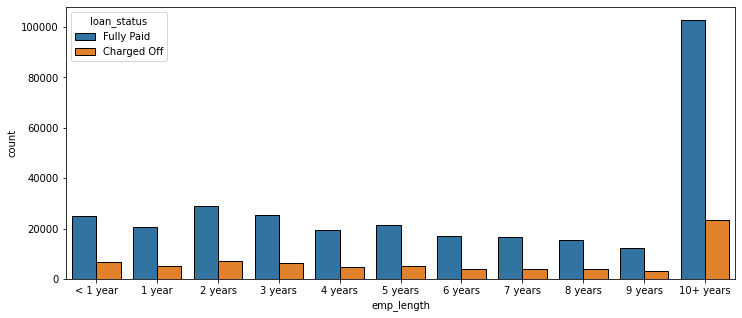

In [167]:
plt.figure(figsize=(12,5))
sns.countplot(x='emp_length',data=df,order=emp_length_order,hue='loan_status')

**This still doesn't really inform me if there is a strong relationship between employment length and being charged off, what I want is the percentage of charge offs per category. Essentially informing me what percent of people per employment category didn't pay back their loan. There are a multitude of ways to create this Series.**

In [168]:
emp_co = df[df['loan_status']=="Charged Off"].groupby("emp_length").count()['loan_status']
emp_fp = df[df['loan_status']=="Fully Paid"].groupby("emp_length").count()['loan_status']

In [169]:
# emp_len = emp_co/emp_fp
emp_len_per = emp_co/(emp_co+emp_fp)

In [170]:
emp_len_per

emp_length
1 year       0.199135
10+ years    0.184186
2 years      0.193262
3 years      0.195231
4 years      0.192385
5 years      0.192187
6 years      0.189194
7 years      0.194774
8 years      0.199760
9 years      0.200470
< 1 year     0.206872
Name: loan_status, dtype: float64

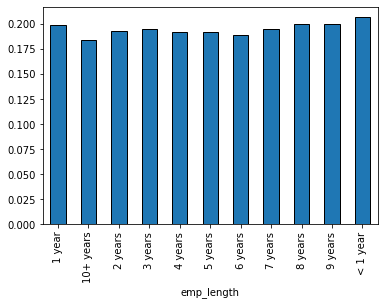

In [171]:
emp_len_per.plot(kind='bar')

**Charge off rates are extremely similar across all employment lengths. I will go ahead and drop the emp_length column.**

In [172]:
df = df.drop('emp_length',axis=1)

**Seeing what feature columns still have missing data.**

In [173]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

**Reviewing the title column vs the purpose column. This is repeated information.**

In [174]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [175]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

**The title column is simply a string subcategory/description of the purpose column. I will drop the title column.**

In [176]:
df = df.drop('title',axis=1)

**After I dropped three categorical features which have missing values, there were only three numerical features left which have missing values are mort_acc, pub_rec_bankruptcies and revol_util. There are many different approaches to deal with missing values. We can delete the entries with missing values or we can fill in the missing values with calculated mean value using another column which correlates with the column with missing values or we can use built in imputation algorithm in Python such as SimpleImputer, IterativeImputer and so on. We can drop the variable if it has more than 50% missing values because imputation would not be reliable in those cases.**

In [177]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [178]:
obj_cols = ['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'title', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address']

**A better strategy is to impute the missing values, to infer them from the known part of the data. I used the IterativeImputer which models each feature with missing values as a function of other features, and uses that estimate for imputation. In the simplest form, we can say IterativeImputer examine other features which don’t have missing values, and then predict the missing values using other features’ information.**

In [179]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [180]:
imp = IterativeImputer(max_iter=50, random_state=0)
imp.fit(df.loc[:, df.columns.difference(obj_cols)])
IterativeImputer(random_state=0)
df.loc[:, df.columns.difference(obj_cols)] = imp.transform(df.loc[:, df.columns.difference(obj_cols)])

In [181]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

## Categorical Variables and Dummy Variables

**I'm done working with the missing data! Now I just need to deal with the string values due to the categorical columns.**


In [182]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

### term feature

**Converting the term feature into either a 36 or 60 integer numeric data type using .apply() or .map().**

In [183]:
df['term'].value_counts()

 36 months    302005
 60 months     94025
Name: term, dtype: int64

In [184]:
## using split() then loop
# a = df['term'].str.split(' ')
# x = []
# for i in a:
#     x.append(int(i[1]))
# df['term'] = x

In [185]:
# Or just use .map()
df['term'] = df['term'].apply(lambda term: int(term[:3]))

In [186]:
df['term'].value_counts()

36    302005
60     94025
Name: term, dtype: int64

### grade feature

**I already know grade is part of sub_grade, so just drop the grade feature.**

In [187]:
df = df.drop('grade',axis=1)

**Converting the subgrade into dummy variables. Then concatenate these new columns to the original dataframe. I drop the original subgrade column and to add drop_first=True to your get_dummies call.**

In [188]:
subgrade_dummies = pd.get_dummies(df['sub_grade'],drop_first=True)

In [189]:
df = pd.concat([df.drop('sub_grade',axis=1),subgrade_dummies],axis=1)

In [190]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [191]:
df.select_dtypes(['object']).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

### verification_status, application_type,initial_list_status,purpose 
**Converting these columns: ['verification_status', 'application_type','initial_list_status','purpose'] into dummy variables and concatenate them with the original dataframe. I set drop_first=True and to drop the original columns.**

In [192]:
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose' ]],drop_first=True)
df = pd.concat([df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1),dummies],axis=1)

### home_ownership
**Reviewing the value_counts for the home_ownership column.**

In [193]:
df['home_ownership'].value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64

**Converting these to dummy variables, but NONE and ANY with OTHER, so that I end up with just 4 categories, MORTGAGE, RENT, OWN, OTHER. Then concatenate them with the original dataframe. I set drop_first=True and to drop the original columns.**

In [194]:
df['home_ownership'] = df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

dummies = pd.get_dummies(df['home_ownership'],drop_first=True)
df = df.drop('home_ownership',axis=1)
df = pd.concat([df,dummies],axis=1)

### address
**Feature engineer a zip code column from the address in the data set. I create a column called 'zip_code' that extracts the zip code from the address column.**

In [195]:
df['zip_code'] = df['address'].apply(lambda address:address[-5:])

**Making this zip_code column into dummy variables using pandas. I concatenate the result and drop the original zip_code column along with dropping the address column.**

In [196]:
dummies = pd.get_dummies(df['zip_code'],drop_first=True)
df = df.drop(['zip_code','address'],axis=1)
df = pd.concat([df,dummies],axis=1)

### issue_d 

**This would be data leakage, I wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory I wouldn't have an issue_date, drop this feature.**

In [197]:
df = df.drop('issue_d',axis=1)

### earliest_cr_line
**This appears to be a historical time stamp feature. I extract the year from this feature using a .apply function, then convert it to a numeric feature. I set this new data to a feature column called 'earliest_cr_year'. Then drop the earliest_cr_line feature.**

In [198]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date:int(date[-4:]))
df = df.drop('earliest_cr_line',axis=1)

In [199]:
df.select_dtypes(['object']).columns

Index(['loan_status'], dtype='object')

## Train Test Split

**Importing train_test_split from sklearn.**

In [200]:
from sklearn.model_selection import train_test_split

**Dropping the loan_status column we created earlier, since its a duplicate of the loan_repaid column. I'll use the loan_repaid column since its already in 0s and 1s.**

In [201]:
df = df.drop('loan_status',axis=1)

**Setting X and y variables to the .values of the features and label.**

In [202]:
X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values


# OPTIONAL

## Grabbing a Sample for Training Time

### OPTIONAL: Use .sample() to grab a sample of the 490k+ entries to save time on training. Highly recommended for lower RAM computers or if you are not using GPU.

In [203]:
# df = df.sample(frac=0.1,random_state=101)
# print(len(df))

**Performing a train/test split with test_size=0.2 and a random_state of 101.**

In [204]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## Normalizing the Data

**Using a MinMaxScaler to normalize the feature data X_train and X_test. I don't want data leakage from the test set so I only fit on the X_train data.**

In [205]:
from sklearn.preprocessing import MinMaxScaler

In [206]:
scaler = MinMaxScaler()

In [207]:
X_train = scaler.fit_transform(X_train)

In [208]:
X_test = scaler.transform(X_test)

# Creating the Model

**Running the cell below to import the necessary Keras functions.**

In [209]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.models import load_model

**Building a sequential model to will be trained on the data. I have unlimited options here.**

In [210]:
# early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 25)

# model = Sequential()

# # input layer
# model.add(Dense(78,input_shape=(X.shape[1],), activation='relu'))
# model.add(Dropout(0.3))

# # hidden layers
# model.add(Dense(39, activation='relu'))
# model.add(Dropout(0.3))

# model.add(Dense(19, activation='relu'))
# model.add(Dropout(0.3))

# model.add(Dense(9, activation='relu'))
# model.add(Dropout(0.3))

# # output layer
# model.add(Dense(units=1,activation='sigmoid'))

# # Compile model
# model.compile(loss='binary_crossentropy', optimizer= 'adam', metrics = ['accuracy'])

In [211]:
# model.fit(x=X_train, 
#         y=y_train, 
#         epochs= 200,
#         batch_size= 256,
#         validation_data=(X_test, y_test),  
#         callbacks = [early_stop], verbose=1,
#         )

Train on 316824 samples, validate on 79206 samples
Epoch 1/200
316824/316824 [==============================] - 7s 23us/sample - loss: 0.3368 - accuracy: 0.8650 - val_loss: 0.2636 - val_accuracy: 0.8890
Epoch 2/200
316824/316824 [==============================] - 7s 21us/sample - loss: 0.2770 - accuracy: 0.8873 - val_loss: 0.2607 - val_accuracy: 0.8890
Epoch 3/200
316824/316824 [==============================] - 7s 22us/sample - loss: 0.2705 - accuracy: 0.8873 - val_loss: 0.2610 - val_accuracy: 0.8890
Epoch 4/200
316824/316824 [==============================] - 7s 22us/sample - loss: 0.2677 - accuracy: 0.8874 - val_loss: 0.2616 - val_accuracy: 0.8890
Epoch 5/200
316824/316824 [==============================] - 7s 23us/sample - loss: 0.2670 - accuracy: 0.8873 - val_loss: 0.2610 - val_accuracy: 0.8890
Epoch 6/200
316824/316824 [==============================] - 7s 23us/sample - loss: 0.2660 - accuracy: 0.8874 - val_loss: 0.2609 - val_accuracy: 0.8890
Epoch 7/200
316824/316824 [==========

316824/316824 [==============================] - 7s 22us/sample - loss: 0.2604 - accuracy: 0.8882 - val_loss: 0.2584 - val_accuracy: 0.8890
Epoch 55/200
316824/316824 [==============================] - 7s 22us/sample - loss: 0.2603 - accuracy: 0.8883 - val_loss: 0.2581 - val_accuracy: 0.8891
Epoch 56/200
316824/316824 [==============================] - 7s 22us/sample - loss: 0.2603 - accuracy: 0.8884 - val_loss: 0.2579 - val_accuracy: 0.8892
Epoch 57/200
316824/316824 [==============================] - 7s 22us/sample - loss: 0.2605 - accuracy: 0.8881 - val_loss: 0.2585 - val_accuracy: 0.8890
Epoch 58/200
316824/316824 [==============================] - 7s 22us/sample - loss: 0.2603 - accuracy: 0.8882 - val_loss: 0.2579 - val_accuracy: 0.8893
Epoch 59/200
316824/316824 [==============================] - 7s 22us/sample - loss: 0.2602 - accuracy: 0.8883 - val_loss: 0.2580 - val_accuracy: 0.8891
Epoch 60/200
316824/316824 [==============================] - 7s 22us/sample - loss: 0.2602 - a

316824/316824 [==============================] - 8s 24us/sample - loss: 0.2582 - accuracy: 0.8887 - val_loss: 0.2587 - val_accuracy: 0.8891
Epoch 108/200
316824/316824 [==============================] - 7s 23us/sample - loss: 0.2583 - accuracy: 0.8888 - val_loss: 0.2592 - val_accuracy: 0.8892
Epoch 109/200
316824/316824 [==============================] - 8s 25us/sample - loss: 0.2580 - accuracy: 0.8891 - val_loss: 0.2588 - val_accuracy: 0.8891
Epoch 110/200
316824/316824 [==============================] - 8s 25us/sample - loss: 0.2583 - accuracy: 0.8889 - val_loss: 0.2587 - val_accuracy: 0.8893
Epoch 00110: early stopping


**Trying to choose best hyperparameters for the neural networks. I just tried one combination that I believe it gave good accuracy because I didn't want to wait too much but you can put as many different hyperparameters as you want. You can try how many combinations you want.**

In [92]:
import itertools

batch_list = [256]
patience_list = [40]
first_layer_list = [0.5]
second_layer_list = [1]
third_layer_list = [4] 
dropout_input = [0.2]
dropout_hidden_1 = [0.2]
dropout_hidden_2 = [0.2]
dropout_hidden_3 = [0.2]
learn_rate = [0.001]
batch_used = []
patience_used = []
first_layer = []
second_layer = []
third_layer = []
drop_input = []
drop_hidden1 = []
drop_hidden2 = []
drop_hidden3 = []
learn_list = []
test_accuracy_l = []
train_accuracy_l = []

for batch, patience, drop_i, drop_h1, drop_h2, drop_h3, r, first, second, third in itertools.product(batch_list,
        patience_list, dropout_input, dropout_hidden_1, dropout_hidden_2,
        dropout_hidden_3, learn_rate, first_layer_list, second_layer_list,
        third_layer_list):
    
    adam = Adam(learning_rate = r)
    early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = patience)

    model = Sequential()

    model.add(Dense(X.shape[1],input_shape=(X.shape[1],), activation='relu'))
    model.add(Dropout(drop_i))
    
    model.add(Dense(X.shape[1]/first, activation='relu'))
    model.add(Dropout(drop_h1))

    model.add(Dense(X.shape[1]/second, activation='relu'))
    model.add(Dropout(drop_h2))

    model.add(Dense(X.shape[1]/third, activation='relu'))
    model.add(Dropout(drop_h3))

    model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer= adam, metrics = ['accuracy'])
    
    model.fit(x=X_train, 
        y=y_train, 
        epochs= 200,
        batch_size= batch,
        validation_data=(X_test, y_test),  
        callbacks = [early_stop], verbose=1,
        )
    
    train_predictions = model.predict_classes(X_train)
    test_predictions = model.predict_classes(X_test)
    
    train_accuracy = accuracy_score(y_train, train_predictions)
    test_accuracy = accuracy_score(y_test, test_predictions)
    
    train_accuracy_l.append(train_accuracy)
    test_accuracy_l.append(test_accuracy)
    batch_used.append(batch)
    patience_used.append(patience)
    drop_input.append(drop_i)
    drop_hidden1.append(drop_h1)
    drop_hidden2.append(drop_h2)
    drop_hidden3.append(drop_h3)
    learn_list.append(r)
    first_layer.append(first)
    second_layer.append(second)
    third_layer.append(third)
    
    print(pd.DataFrame(accuracy_list,columns=['Best Accuracy']).sort_values(by='Best Accuracy').max().round(4).to_string())
    
    # Saving the best model
    if test_accuracy == max(test_accuracy_l):
        model.save("Best_Model_With" + str(test_accuracy * 100))
    else:
        None
 
    print()

Train on 316824 samples, validate on 79206 samples
Epoch 1/200
316824/316824 [==============================] - 23s 72us/sample - loss: 0.2990 - accuracy: 0.8761 - val_loss: 0.2605 - val_accuracy: 0.8890
Epoch 2/200
316824/316824 [==============================] - 21s 66us/sample - loss: 0.2647 - accuracy: 0.8878 - val_loss: 0.2598 - val_accuracy: 0.8890
Epoch 3/200
316824/316824 [==============================] - 18s 57us/sample - loss: 0.2632 - accuracy: 0.8878 - val_loss: 0.2594 - val_accuracy: 0.8890 - ETA
Epoch 4/200
316824/316824 [==============================] - 18s 57us/sample - loss: 0.2622 - accuracy: 0.8880 - val_loss: 0.2601 - val_accuracy: 0.8890
Epoch 5/200
316824/316824 [==============================] - 18s 56us/sample - loss: 0.2617 - accuracy: 0.8879 - val_loss: 0.2592 - val_accuracy: 0.8890curacy: 0.88 - ETA: 0s - loss: 0.2618 - accuracy: 0.
Epoch 6/200
316824/316824 [==============================] - 18s 58us/sample - loss: 0.2609 - accuracy: 0.8878 - val_loss: 0.2

In [95]:
batch = pd.DataFrame(batch_used,columns=['Batch Size'])
patience = pd.DataFrame(patience_used,columns=['Patience'])
drop_i = pd.DataFrame(drop_input,columns=['Input Layer Dropout'])
drop_h1 = pd.DataFrame(drop_hidden1,columns=['1st Hidden Dropout'])
drop_h2 = pd.DataFrame(drop_hidden2,columns=['2nd Hidden Dropout'])
drop_h3 = pd.DataFrame(drop_hidden3,columns=['3rd Hidden Dropout'])
r = pd.DataFrame(learn_list,columns=['Learning Rate'])
first = pd.DataFrame(first_layer,columns=['First Layer Divisor'])
second = pd.DataFrame(second_layer,columns=['Second Layer Divisor'])
third = pd.DataFrame(third_layer,columns=['Third Layer Divisor'])
train_acc = pd.DataFrame(train_accuracy_l, columns=['Train Accuracy'])
test_acc = pd.DataFrame(test_accuracy_l, columns=['Test Accuracy'])

results = pd.concat([batch, patience, drop_i, drop_h1, drop_h2,
                    drop_h3, r, first, second, third, train_acc, test_acc],axis=1)

results.sort_values(by='Test Accuracy')

,Batch Size,Patience,Input Layer Dropout,1st Hidden Dropout,2nd Hidden Dropout,3rd Hidden Dropout,Learning Rate,First Layer Divisor,Second Layer Divisor,Third Layer Divisor,Train Accuracy,Test Accuracy
0,256,40,0.2,0.2,0.2,0.2,0.001,0.5,1,4,0.892817,0.888859


# Section 3: Evaluating Model Performance.

**Plotting out the validation loss versus the training loss.**

In [212]:
losses = pd.DataFrame(model.history.history)

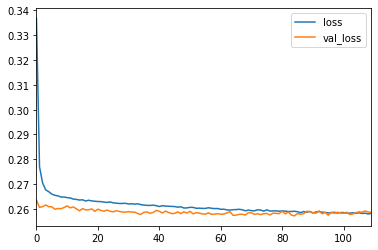

In [213]:
losses[['loss','val_loss']].plot()

**Creating predictions from the X_test set and display a classification report and confusion matrix for the X_test set.**

In [214]:
from sklearn.metrics import classification_report,confusion_matrix,balanced_accuracy_score

In [215]:
predictions = model.predict_classes(X_test)

In [216]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.99      0.44      0.61     15493
         1.0       0.88      1.00      0.94     63713

    accuracy                           0.89     79206
   macro avg       0.93      0.72      0.77     79206
weighted avg       0.90      0.89      0.87     79206



In [217]:
confusion_matrix(y_test,predictions)

array([[ 6801,  8692],
       [   73, 63640]], dtype=int64)

**There is a customer below, would you offer this person a loan?**

In [218]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt           24000.00
term                   60.00
int_rate               13.11
installment           547.43
annual_inc          85000.00
                      ...   
48052                   0.00
70466                   0.00
86630                   0.00
93700                   0.00
earliest_cr_year     1991.00
Name: 304691, Length: 78, dtype: float64

In [219]:
model.predict_classes(new_customer.values.reshape(1,78))

array([[1]])

**I check if did this person actually end up paying back their loan.**

In [220]:
df.iloc[random_ind]['loan_repaid']

1.0